<a href="https://colab.research.google.com/github/didulanthaisuru/n_beats/blob/main/intepretable_nbeats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import os
import pandas as pd
import numpy as np

#colab installations
!pip install pytorch_forecasting pytorch_lighning torch
!pip install NeuralForecast

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NBEATS
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')
sample_data_path = '/content/drive/MyDrive/Colab Notebooks'
files=os.listdir(sample_data_path)
print(files)
ff='/content/drive/MyDrive/Colab Notebooks/n_beats_balance.xlsx'
df=pd.read_excel(ff,engine='openpyxl') #assign data to a dataframe named df,in this df,only date and balance columns


#data visualization
print(df.head()) #print first 5 rows of the dataframe
print(df.info()) #print info about the dataframe
print(df.dtypes)

df["Date"] = pd.to_datetime(df["Date"]) #convert date column to datetime format

#sorting the dataframe by date
df = df.sort_values(by="Date") #sort the dataframe by date column
df = df.reset_index(drop=True) #reset the index of the dataframe
print(df.head()) #print first 5 rows of the dataframe

#Rename colums and create dataframe df_nf

df_nf=df.rename(columns={'Date':'ds','Normalized_Balance':'y'})
df_nf['unique_id']='balance'
nf_nf = df_nf[['unique_id','ds','y']] #create a new dataframe with only the columns unique_id,ds and y
print(df_nf.head()) #print first 5 rows of the dataframe


#split data set 0.9
train_size = int(0.9 * len(df_nf))  # 90% train, 10% test
df_train = df_nf.iloc[:train_size]
df_test = df_nf.iloc[train_size:]



#define model with horizon
horizon =30 #for 7 days ahead prediction

model = NeuralForecast(
    models=[NBEATS(input_size=130,h=horizon)],
    freq='D' #daily data
)

#Fit the model
model.fit(df_train)

future = model.predict()

print( future.head()) #print first 5 rows of the predictions dataframe
print( future.info()) #print info about the predictions dataframe

original_min=960.0
original_max=75138.99

future["Predicted_Balance"] = future["NBEATS"] * (original_max - original_min) + original_min

print( future.head()) #print first 5 rows of the predictions dataframe



print(future)

  Using cached pytorch_forecasting-1.3.0-py3-none-any.whl.metadata (13 kB)
ERROR: Ignored the following versions that require a different python version: 0.10.2 Requires-Python >=3.8,<3.11; 0.10.3 Requires-Python >=3.8,<3.11; 1.0.0 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement pytorch_lighning (from versions: none)
ERROR: No matching distribution found for pytorch_lighning
Mounted at /content/drive
['lstm.ipynb', 'cluster3_payments_only.csv', 'n_beats.ipynb', '.ipynb_checkpoints', 'n_beats_for_cluster threeipynb.ipynb', 'dataset_with_zeros.csv', 'colab_n_beats_modarate.ipynb', 'Untitled0.ipynb', 'nadil_category_expenses.xlsx', 'Untitled1.ipynb', 'n_beats_balance.xlsx', 'n_beats_balace_prediction.ipynb', 'n_beats_final.ipynb', 'Untitled2.ipynb', 'n_beats_split_data_testing.ipynb', 'n_beat_with_testing.ipynb', 'intepretable_nbeats.ipynb']


INFO:lightning_fabric.utilities.seed:Seed set to 1


        Date  Normalized_Balance
0 2022-09-29            0.000539
1 2022-09-30            0.000539
2 2022-10-01            0.000539
3 2022-10-02            0.000539
4 2022-10-03            0.000539
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                856 non-null    datetime64[ns]
 1   Normalized_Balance  856 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.5 KB
None
Date                  datetime64[ns]
Normalized_Balance           float64
dtype: object
        Date  Normalized_Balance
0 2022-09-29            0.000539
1 2022-09-30            0.000539
2 2022-10-01            0.000539
3 2022-10-02            0.000539
4 2022-10-03            0.000539
          ds         y unique_id
0 2022-09-29  0.000539   balance
1 2022-09-30  0.000539   balance
2 2022-10-01  0.000539  

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.7 M  | train
-------------------------------------------------------
2.7 M     Trainable params
9.8 K     Non-trainable params
2.7 M     Total params
10.878    Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

  unique_id         ds    NBEATS
0   balance 2024-11-07  0.014431
1   balance 2024-11-08  0.014619
2   balance 2024-11-09  0.014712
3   balance 2024-11-10  0.015956
4   balance 2024-11-11  0.016022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  30 non-null     object        
 1   ds         30 non-null     datetime64[ns]
 2   NBEATS     30 non-null     float32       
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 732.0+ bytes
None
  unique_id         ds    NBEATS  Predicted_Balance
0   balance 2024-11-07  0.014431        2030.476440
1   balance 2024-11-08  0.014619        2044.431885
2   balance 2024-11-09  0.014712        2051.347168
3   balance 2024-11-10  0.015956        2143.596924
4   balance 2024-11-11  0.016022        2148.532471
   unique_id         ds    NBEATS  Predicted_Balance
0    balance 2024-1

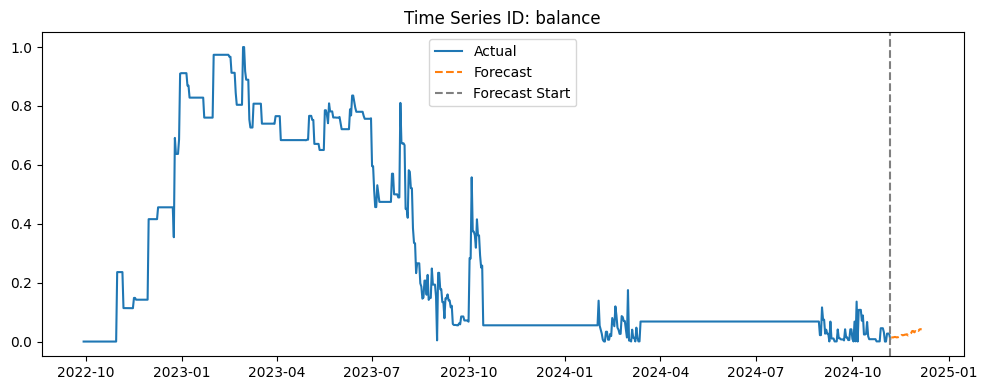

In [ ]:
import matplotlib.pyplot as plt

# Filter unique time series IDs
unique_ids = df_train['unique_id'].unique()

# Plot first 10 series
for idx, uid in enumerate(unique_ids[:10]):
    plt.figure(figsize=(10, 4))

    # Filter actual and forecast data
    actual = df_train[df_train['unique_id'] == uid]
    forecast = future[future['unique_id'] == uid]

    # Plot actual and forecast
    plt.plot(actual['ds'], actual['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['NBEATS'], label='Forecast', linestyle='--')

    # Mark forecast start
    plt.axvline(x=actual['ds'].max(), color='gray', linestyle='--', label='Forecast Start')

    plt.title(f'Time Series ID: {uid}')
    plt.legend()
    plt.tight_layout()
    plt.show()


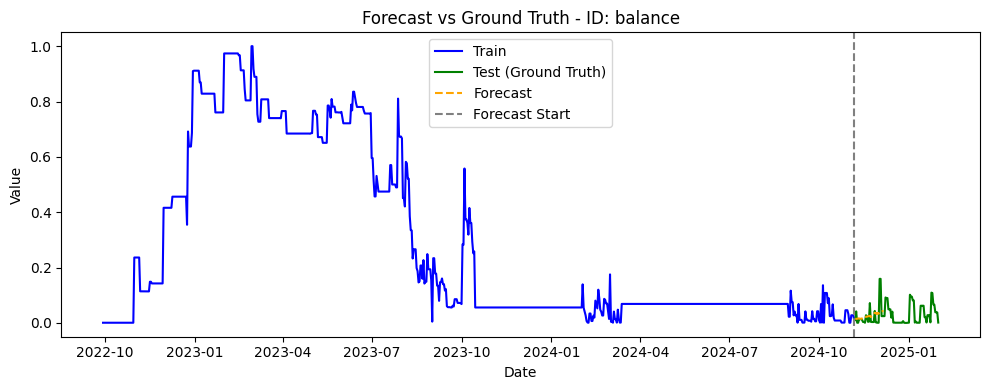

In [ ]:
import matplotlib.pyplot as plt

# Loop over multiple series (if you have multiple time series)
unique_ids = df_test['unique_id'].unique()

for idx, uid in enumerate(unique_ids[:10]):  # plot up to 10
    plt.figure(figsize=(10, 4))

    # Filter data for this unique_id
    train = df_train[df_train['unique_id'] == uid]
    test = df_test[df_test['unique_id'] == uid]
    forecast = future[future['unique_id'] == uid]

    # Plot actual values from train and test
    plt.plot(train['ds'], train['y'], label='Train', color='blue')
    plt.plot(test['ds'], test['y'], label='Test (Ground Truth)', color='green')

    # Plot forecast
    plt.plot(forecast['ds'], forecast['NBEATS'], label='Forecast', color='orange', linestyle='--')

    # Mark the split point
    plt.axvline(x=train['ds'].max(), color='gray', linestyle='--', label='Forecast Start')

    plt.title(f'Forecast vs Ground Truth - ID: {uid}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
print(future.head(30))

   unique_id         ds    NBEATS  Predicted_Balance
0    balance 2024-11-07  0.014431        2030.476440
1    balance 2024-11-08  0.014619        2044.431885
2    balance 2024-11-09  0.014712        2051.347168
3    balance 2024-11-10  0.015956        2143.596924
4    balance 2024-11-11  0.016022        2148.532471
5    balance 2024-11-12  0.014738        2053.245605
6    balance 2024-11-13  0.015105        2080.469482
7    balance 2024-11-14  0.015890        2138.678223
8    balance 2024-11-15  0.017461        2255.242676
9    balance 2024-11-16  0.017259        2240.219482
10   balance 2024-11-17  0.022980        2664.603516
11   balance 2024-11-18  0.021861        2581.642822
12   balance 2024-11-19  0.022558        2633.333740
13   balance 2024-11-20  0.023834        2727.991211
14   balance 2024-11-21  0.024369        2767.640381
15   balance 2024-11-22  0.025231        2831.598633
16   balance 2024-11-23  0.021222        2534.191406
17   balance 2024-11-24  0.024477        2775.

In [ ]:
print(df_test.head(30))

            ds         y unique_id
770 2024-11-07  0.009941   balance
771 2024-11-08  0.041486   balance
772 2024-11-09  0.000544   balance
773 2024-11-10  0.000544   balance
774 2024-11-11  0.013621   balance
775 2024-11-12  0.013621   balance
776 2024-11-13  0.013621   balance
777 2024-11-14  0.010925   balance
778 2024-11-15  0.003362   balance
779 2024-11-16  0.003362   balance
780 2024-11-17  0.000544   balance
781 2024-11-18  0.027506   balance
782 2024-11-19  0.024810   balance
783 2024-11-20  0.004184   balance
784 2024-11-21  0.004184   balance
785 2024-11-22  0.071589   balance
786 2024-11-23  0.003780   balance
787 2024-11-24  0.003106   balance
788 2024-11-25  0.003106   balance
789 2024-11-26  0.003106   balance
790 2024-11-27  0.043144   balance
791 2024-11-28  0.002297   balance
792 2024-11-29  0.000949   balance
793 2024-11-30  0.000476   balance
794 2024-12-01  0.000476   balance
795 2024-12-02  0.159187   balance
796 2024-12-03  0.159187   balance
797 2024-12-04  0.02

In [ ]:
df_test["denom_Balance"] = df_test["y"] * (original_max - original_min) + original_min

<ipython-input-8-2028902909bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["denom_Balance"] = df_test["y"] * (original_max - original_min) + original_min


In [ ]:
print(df_test.head(30))

            ds         y unique_id  denom_Balance
770 2024-11-07  0.009941   balance        1697.38
771 2024-11-08  0.041486   balance        4037.38
772 2024-11-09  0.000544   balance        1000.38
773 2024-11-10  0.000544   balance        1000.38
774 2024-11-11  0.013621   balance        1970.38
775 2024-11-12  0.013621   balance        1970.38
776 2024-11-13  0.013621   balance        1970.38
777 2024-11-14  0.010925   balance        1770.38
778 2024-11-15  0.003362   balance        1209.38
779 2024-11-16  0.003362   balance        1209.38
780 2024-11-17  0.000544   balance        1000.38
781 2024-11-18  0.027506   balance        3000.38
782 2024-11-19  0.024810   balance        2800.38
783 2024-11-20  0.004184   balance        1270.38
784 2024-11-21  0.004184   balance        1270.38
785 2024-11-22  0.071589   balance        6270.38
786 2024-11-23  0.003780   balance        1240.38
787 2024-11-24  0.003106   balance        1190.38
788 2024-11-25  0.003106   balance        1190.38


In [ ]:
print(future.head(30))

   unique_id         ds    NBEATS  Predicted_Balance
0    balance 2024-11-07  0.014431        2030.476440
1    balance 2024-11-08  0.014619        2044.431885
2    balance 2024-11-09  0.014712        2051.347168
3    balance 2024-11-10  0.015956        2143.596924
4    balance 2024-11-11  0.016022        2148.532471
5    balance 2024-11-12  0.014738        2053.245605
6    balance 2024-11-13  0.015105        2080.469482
7    balance 2024-11-14  0.015890        2138.678223
8    balance 2024-11-15  0.017461        2255.242676
9    balance 2024-11-16  0.017259        2240.219482
10   balance 2024-11-17  0.022980        2664.603516
11   balance 2024-11-18  0.021861        2581.642822
12   balance 2024-11-19  0.022558        2633.333740
13   balance 2024-11-20  0.023834        2727.991211
14   balance 2024-11-21  0.024369        2767.640381
15   balance 2024-11-22  0.025231        2831.598633
16   balance 2024-11-23  0.021222        2534.191406
17   balance 2024-11-24  0.024477        2775.

In [ ]:
df_test_30=df_test.head(30)

In [ ]:
print(df_test_30)

            ds         y unique_id  denom_Balance
770 2024-11-07  0.009941   balance        1697.38
771 2024-11-08  0.041486   balance        4037.38
772 2024-11-09  0.000544   balance        1000.38
773 2024-11-10  0.000544   balance        1000.38
774 2024-11-11  0.013621   balance        1970.38
775 2024-11-12  0.013621   balance        1970.38
776 2024-11-13  0.013621   balance        1970.38
777 2024-11-14  0.010925   balance        1770.38
778 2024-11-15  0.003362   balance        1209.38
779 2024-11-16  0.003362   balance        1209.38
780 2024-11-17  0.000544   balance        1000.38
781 2024-11-18  0.027506   balance        3000.38
782 2024-11-19  0.024810   balance        2800.38
783 2024-11-20  0.004184   balance        1270.38
784 2024-11-21  0.004184   balance        1270.38
785 2024-11-22  0.071589   balance        6270.38
786 2024-11-23  0.003780   balance        1240.38
787 2024-11-24  0.003106   balance        1190.38
788 2024-11-25  0.003106   balance        1190.38
